# Import data

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy as np
from sklearn.model_selection import ParameterGrid
import random 

# Setting the random state
random_state = 341
torch.manual_seed(random_state)
np.random.seed(random_state)
rand_gen = np.random.default_rng(random_state)
random.seed(random_state)


In [2]:
# Importing the dataset
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Displays the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Displays the description of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


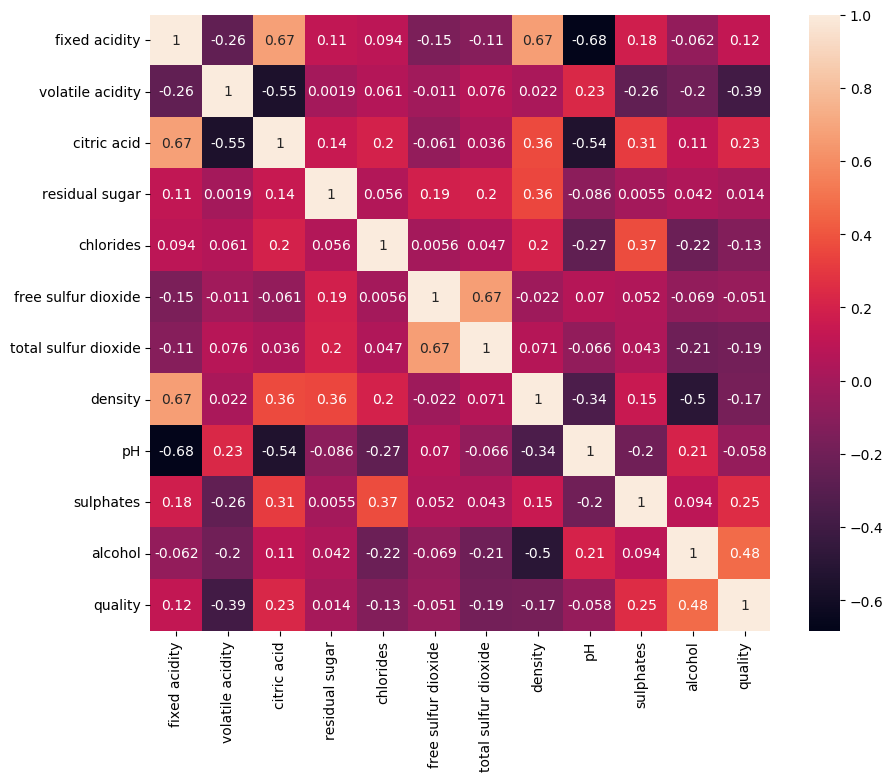

In [5]:
# Displays the correlation between the columns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

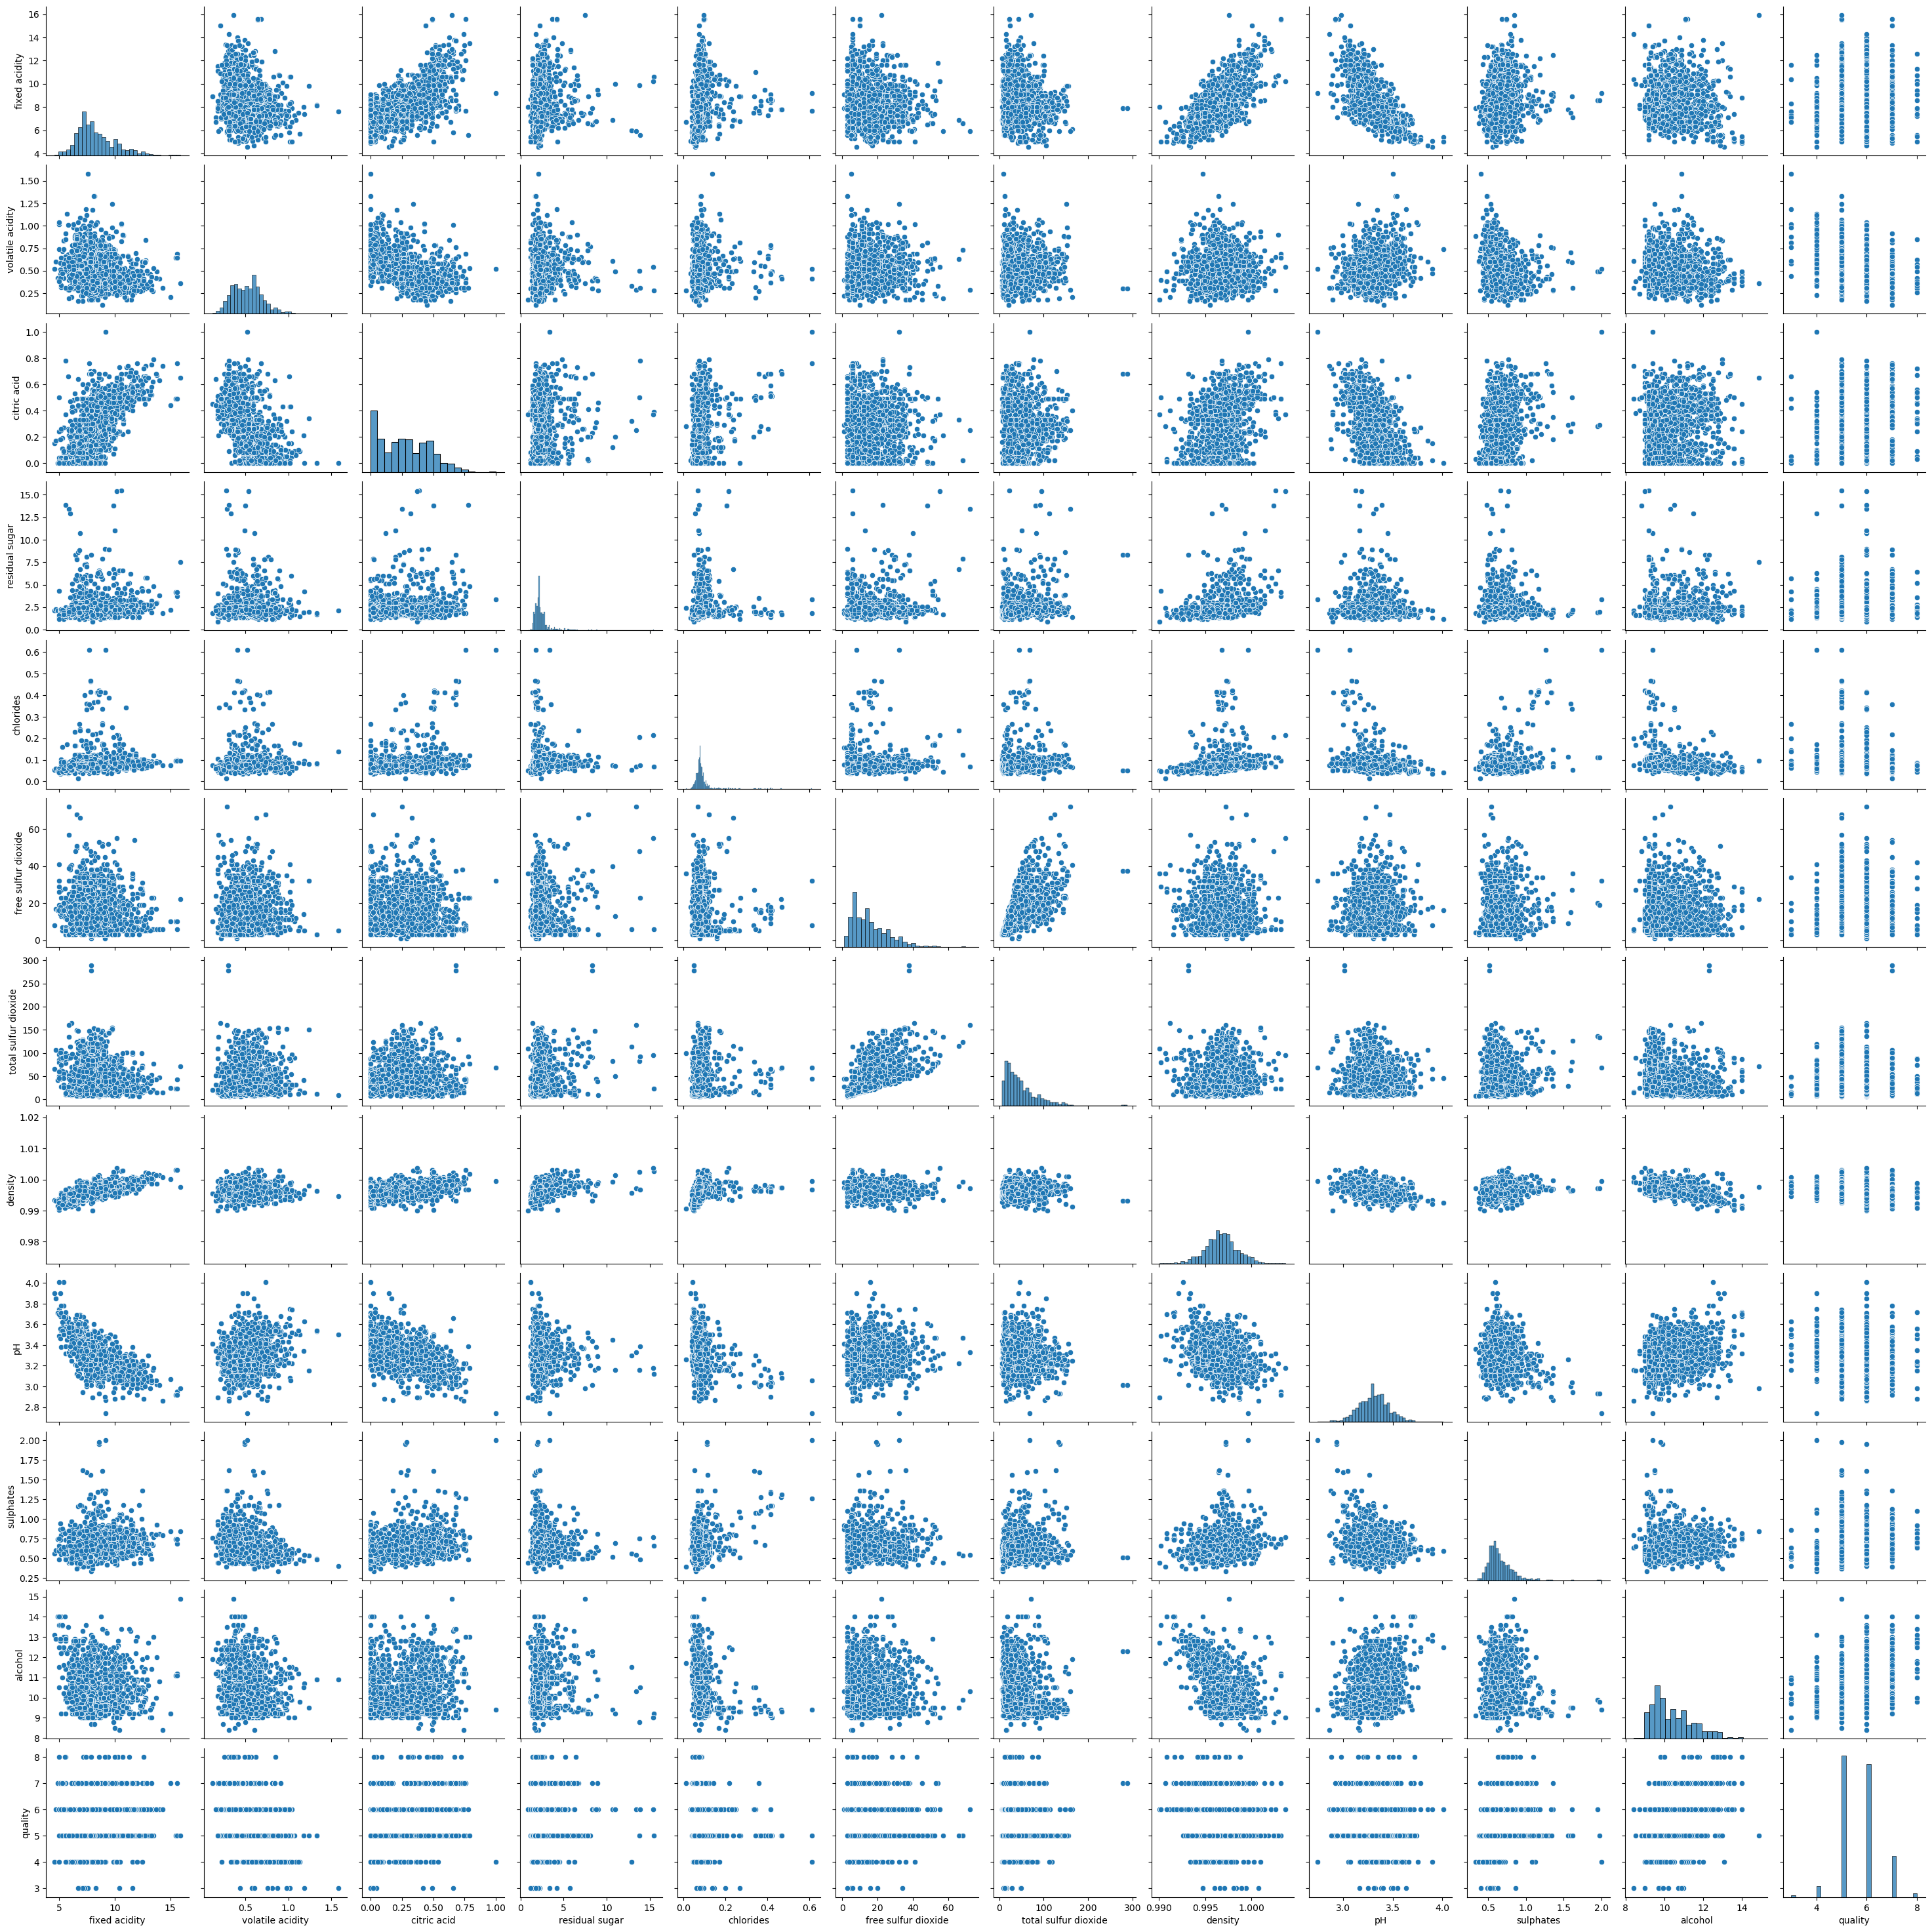

In [6]:
# Plot the pairplot of the dataset to see the relationship between the columns
sns.pairplot(df)

### Data Manupulation (Preperation for the model)

In [7]:
# Split the dataset into X and y where X is the features and y is the target
X, y = df.iloc[:,:-1], df.iloc[:,-1]

In [8]:
# Display the target
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [9]:
# Split the dataset into train, test and validation sets

# Split the dataset into train and temporary (30%)
train_x, temp_x, train_y, temp_y = train_test_split(X, y, test_size=0.3, random_state=random_state)
# Split the temporary dataset into validation (15%) and test (15%)
valid_x, test_x, valid_y, test_y = train_test_split(temp_x, temp_y, test_size=0.5, random_state=random_state)


In [10]:
# Display the shape of the train_x
train_x.shape

(1119, 11)

In [11]:
# Display the shape of the valid_x
valid_x.shape

(240, 11)

In [12]:
# Display the shape of the test_x
test_x.shape

(240, 11)

In [13]:
# Convert train, validation, and test sets to tensors
train_x = torch.tensor(train_x.to_numpy(), dtype=torch.float)
valid_x = torch.tensor(valid_x.to_numpy(), dtype=torch.float)
test_x = torch.tensor(test_x.to_numpy(), dtype=torch.float)

# Convert train, validation, and test labels to tensors
train_y = torch.tensor(train_y.to_numpy(), dtype=torch.float)
valid_y = torch.tensor(valid_y.to_numpy(), dtype=torch.float)
test_y = torch.tensor(test_y.to_numpy(), dtype=torch.float)


In [14]:
# Display train_x
train_x

tensor([[ 8.8000,  0.5500,  0.0400,  ...,  3.2100,  0.6000, 10.9000],
        [ 7.8000,  0.3400,  0.3700,  ...,  3.3400,  0.5900,  9.4000],
        [11.6000,  0.4100,  0.5800,  ...,  3.1300,  0.5300, 10.0000],
        ...,
        [ 8.9000,  0.4000,  0.3200,  ...,  3.3800,  0.7700, 10.5000],
        [ 7.7000,  0.5600,  0.0800,  ...,  3.2400,  0.6600,  9.6000],
        [ 8.8000,  0.6000,  0.2900,  ...,  3.3600,  0.4900,  9.1000]])

In [15]:
# Display train_y
train_y

tensor([6., 6., 5.,  ..., 7., 6., 5.])

In [16]:
# Create a class for the dataset
class WineDataset(Dataset):
    def __init__(self, X, y):
        self.x = X
        self.y = y

    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return len(self.x)

In [17]:
# Create the dataset
train_data = WineDataset(train_x, train_y)
valid_data = WineDataset(valid_x, valid_y)
test_data = WineDataset(test_x, test_y)

In [18]:
# Create the data loaders
train_loader = DataLoader(dataset=train_data)

# Creating a basic MLP

In [19]:
# Define the model
class WineMLP(torch.nn.Module):
    def __init__(self, n_inputs, hidden_size, n_outputs):
        super(WineMLP, self).__init__()
        
        self.inputs = n_inputs
        self.hidden = hidden_size
        self.outputs = n_outputs
        
        self.fc1 = torch.nn.Linear(self.inputs, self.hidden)
        self.fc2 = torch.nn.Linear(self.hidden, self.outputs)
        self.relu = torch.nn.ReLU()
    
    def forward(self, X):
        out = self.fc1(X)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [20]:
# Create the model
model = WineMLP(11, 5, 1)

In [21]:
# Display the model
model

WineMLP(
  (fc1): Linear(in_features=11, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
)

In [22]:
# Define the loss function
criterion = torch.nn.MSELoss()

# Define the optimizer
optimiser = torch.optim.SGD(params=model.parameters(), lr=0.0001)

In [23]:
# Training loop
epochs = 20

train_loss = []
valid_loss = []

for epoch in range(epochs):
    batch_loss = []
    model.train()
    for features, targets in train_loader:
        output = model.forward(features)
        loss = criterion(output, targets)
        batch_loss.append(loss.item())
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
    model.eval()
    train_loss.append(sum(batch_loss) / len(batch_loss))
    hyp_valid = model.forward(valid_x)
    hyp_valid = hyp_valid.squeeze()
    c = torch.round(hyp_valid)
    valid_loss.append(criterion(hyp_valid, valid_y).item())
    valid_acc = (c == valid_y).sum().item() / valid_y.shape[0]
    print('Valid acc:', valid_acc, 'Valid loss:', valid_loss[-1])

/Users/bharathradhakrishnan/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Valid acc: 0.3541666666666667 Valid loss: 1.1514801979064941
Valid acc: 0.37083333333333335 Valid loss: 0.9520844221115112
Valid acc: 0.36666666666666664 Valid loss: 0.8234478831291199
Valid acc: 0.3625 Valid loss: 0.838514506816864
Valid acc: 0.3625 Valid loss: 0.8237212300300598
Valid acc: 0.37916666666666665 Valid loss: 0.8035401701927185
Valid acc: 0.37916666666666665 Valid loss: 0.7830437421798706
Valid acc: 0.38333333333333336 Valid loss: 0.7649463415145874
Valid acc: 0.3875 Valid loss: 0.7493420243263245
Valid acc: 0.38333333333333336 Valid loss: 0.7339037656784058
Valid acc: 0.39166666666666666 Valid loss: 0.7203134298324585
Valid acc: 0.4041666666666667 Valid loss: 0.7063004374504089
Valid acc: 0.4 Valid loss: 0.618480384349823
Valid acc: 0.3958333333333333 Valid loss: 0.6180597543716431
Valid acc: 0.4083333333333333 Valid loss: 0.6154426336288452
Valid acc: 0.4125 Valid loss: 0.6110035181045532
Valid acc: 0.4083333333333333 Valid loss: 0.606110155582428
Valid acc: 0.4 Valid l

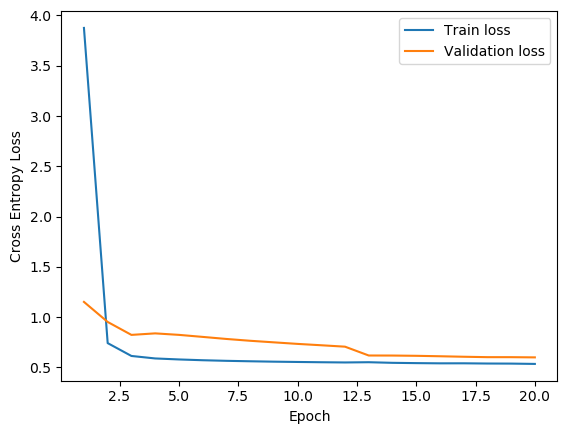

In [24]:
# Plotting graphs for epochs vs. train && epochs vs. valid
def plot_loss_curves(epochs, train_loss, valid_loss):
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, valid_loss, label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy Loss')
    plt.legend()
    plt.show()
plot_loss_curves(np.linspace(1, epochs, epochs), train_loss, valid_loss)

In [25]:
# Run the model on the validation set
hyp_valid = model.forward(valid_x)
hyp_valid = hyp_valid.squeeze()
c = torch.round(hyp_valid)
valid_loss = criterion(hyp_valid, valid_y).item()
valid_acc = (c == valid_y).sum().item() / valid_y.shape[0]
print('Valid acc:', valid_acc, 'Valid loss:', valid_loss)

Valid acc: 0.4166666666666667 Valid loss: 0.5998030304908752


In [26]:
# Run the model on the test set
hyp_test = model.forward(test_x)
hyp_test = hyp_test.squeeze()
c = torch.round(hyp_test)
test_loss = criterion(hyp_test, test_y).item()
test_acc = (c == test_y).sum().item() / test_y.shape[0]
print('Test acc:', test_acc, 'Test loss:', test_loss)

Test acc: 0.42083333333333334 Test loss: 0.7903222441673279


# Making changes to basic MLP

To improve the model, the grid search pattern was implemented. The hyperparameters consodered are -

Hyperparameters:

- Learning rate
- Hidden size
- Momentum
- Batch size
- Epochs
- Activation function: ReLU, Sigmoid, Tanh, Leaky ReLU
- Optimizer: Adam, SGD, RMSprop



Modifications tried with each hyperparameter individually - 

1) Increased hidden neurons - 10 makes validation accuracy from 0.5 to 0.535, 20 also 0.535
2) Changed Batch size, got lower accuracy above and below value 6
3) Modified LR - best at 0.0005
4) Sigmoid activation function reduced accuracy, when applied after fc1 and after fc2
7) Changing to valid_loss = criterion(c, valid_y).item() ie using rounded values instead of float values, accuracy reduces to 0.46

Performed grid search on the following param_grid with epochs set to 100.

First grid search:

param_grid = {

    'learning_rate': [0.00001, 0.0001, 0.001],

    'hidden_size': [10, 7, 4],

    'batch_size': [6, 12, 24],
    
    'momentum': [0.7, 0.8, 0.9]

}

best validation accuracy: 0.53


param_grid = {

    'learning_rate': [0.00001, 0.0005, 0.0001, 0.005, 0.001, 0.01],

    'hidden_size': [3, 6, 9, 12, 15],

    'batch_size': [5, 10, 15, 25, 50],

    'momentum': [0.7, 0.8, 0.9, 0.95, 0.99]

}

best validation accuracy: 0.54

param_grid = {

    'learning_rate': [0.00001, 0.0001, 0.001, 0.01],

    'hidden_size': [3, 6, 10, 15],

    'momentum': [0.7, 0.9, 0.97],

    'batch_size': [5, 10, 15],

    'activation': ['leaky_relu'],

    'optimiser': ['SGD', 'Adam', 'RMSprop']

}

best validation accuracy: 0.55


Best Chosen Configuration - {'activation': 'leaky_relu',
  'batch_size': 10,
  'hidden_size': 10,
  'learning_rate': 0.001,
  'momentum': 0.9,
  'optimiser': 'SGD'},


<br>

Improvement in test accuracy from 0.42 to 0.56 -> which is > 10% increase

Improvement in test loss from 0.79 to 0.59 -> which is > 10% decrease

<br>

Improvement in validation accuracy from 0.41 to 0.59 -> which is > 10% increase

Improvement in validation loss from 0.59 to 0.56 -> which is > 5% decrease


In [27]:
# Define the model
class WineMLPOpt(torch.nn.Module):
    def __init__(self, n_inputs, hidden_size, n_outputs, activation = None):
        super(WineMLPOpt, self).__init__()
        
        self.inputs = n_inputs
        self.hidden = hidden_size
        self.outputs = n_outputs
        
        self.fc1 = torch.nn.Linear(self.inputs, self.hidden)
        self.fc2 = torch.nn.Linear(self.hidden, self.outputs)
        if activation == 'relu':
            self.act = torch.nn.ReLU()
        elif activation == 'sigmoid':
            self.act = torch.nn.Sigmoid()
        elif activation == 'leaky_relu':
            self.act = torch.nn.LeakyReLU()
        elif activation == 'tanh':
            self.act = torch.nn.Tanh()
        else:
            print("Using default activation relu")
            self.act = torch.nn.ReLU()
    
    def forward(self, X):
        out = self.fc1(X)
        out = self.act(out)
        out = self.fc2(out)
        return out

In [28]:
# Set the search grid for hyperparameters
param_grid = {
    # 'learning_rate': [0.00001, 0.0005, 0.0001, 0.005, 0.001, 0.01],
    'learning_rate': [0.00001, 0.0001, 0.001, 0.01],
    # 'hidden_size': [3, 6, 9, 12, 15],
    'hidden_size': [3, 6, 10, 15],
    # 'momentum': [0.7, 0.8, 0.9, 0.95, 0.99],
    'momentum': [0.7, 0.9, 0.97],
    # 'batch_size': [5, 10, 15, 25, 50],
    'batch_size': [5, 10, 15],
    # 'activation': ['relu', 'sigmoid', 'leaky_relu', 'tanh'],
    'activation': ['leaky_relu'],
    'optimiser': ['SGD', 'Adam', 'RMSprop']
}
grid = ParameterGrid(param_grid)

In [29]:
# Training with grid search
epochs = 100

best_val_acc = 0
best_params = None

for params in grid:

    if params['optimiser'] != 'SGD':
        if params['momentum'] < param_grid['momentum'][-1]:
            continue

    train_loader = DataLoader(dataset=train_data, batch_size=params['batch_size'])
    model = WineMLPOpt(11, params['hidden_size'], 1, activation=params['activation'])
    if params['optimiser'] == 'SGD':
        optimiser = torch.optim.SGD(params=model.parameters(), lr=params['learning_rate'], momentum=params['momentum'])
    elif params['optimiser'] == 'Adam':
        optimiser = torch.optim.Adam(params=model.parameters(), lr=params['learning_rate'])
    elif params['optimiser'] == 'RMSprop':
        optimiser = torch.optim.RMSprop(params=model.parameters(), lr=params['learning_rate'])
    criterion = torch.nn.MSELoss()
    
    for epoch in range(epochs):
        if epoch == 50:
            if train_loss[-1] > 1:
                print('Early stopping,', end=' ')
                break
        batch_loss = []
        model.train()
        for features, targets in train_loader:
            output = model.forward(features)
            loss = criterion(output, targets)
            batch_loss.append(loss.item())
            optimiser.zero_grad()
            loss.backward()
            optimiser.step()
        model.eval()
    hyp_valid = model.forward(valid_x)
    hyp_valid = hyp_valid.squeeze()
    c = torch.round(hyp_valid)
    valid_loss = criterion(hyp_valid, valid_y).item()
    valid_acc = (c == valid_y).sum().item() / valid_y.shape[0]
    print('Params:', params)
    print('Valid acc:', valid_acc, 'Valid loss:', valid_loss)
    if valid_acc > best_val_acc:
        best_val_acc = valid_acc
        best_params = params.copy()
        best_model_state = model.state_dict()
        torch.save(best_model_state, 'best_model.pth')
        best_hidden_size = params['hidden_size']
        best_activation = params['activation']

/Users/bharathradhakrishnan/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/bharathradhakrishnan/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Params: {'activation': 'leaky_relu', 'batch_size': 5, 'hidden_size': 3, 'learning_rate': 1e-05, 'momentum': 0.7, 'optimiser': 'SGD'}
Valid acc: 0.5166666666666667 Valid loss: 0.46058928966522217
Params: {'activation': 'leaky_relu', 'batch_size': 5, 'hidden_size': 3, 'learning_rate': 1e-05, 'momentum': 0.9, 'optimiser': 'SGD'}
Valid acc: 0.525 Valid loss: 0.458583265542984
Params: {'activation': 'leaky_relu', 'batch_size': 5, 'hidden_size': 3, 'learning_rate': 1e-05, 'momentum': 0.97, 'optimiser': 'SGD'}
Valid acc: 0.5208333333333334 Valid loss: 0.4643673300743103
Params: {'activation': 'leaky_relu', 'batch_size': 5, 'hidden_size': 3, 'learning_rate': 1e-05, 'momentum': 0.97, 'optimiser': 'Adam'}
Valid acc: 0.1 Valid loss: 7.642735958099365
Params: {'activation': 'leaky_relu', 'batch_size': 5, 'hidden_size': 3, 'learning_rate': 1e-05, 'momentum': 0.97, 'optimiser': 'RMSprop'}
Valid acc: 0.14166666666666666 Valid loss: 4.62217903137207
Params: {'activation': 'leaky_relu', 'batch_size': 5

/Users/bharathradhakrishnan/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/bharathradhakrishnan/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([9])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Params: {'activation': 'leaky_relu', 'batch_size': 10, 'hidden_size': 3, 'learning_rate': 1e-05, 'momentum': 0.7, 'optimiser': 'SGD'}
Valid acc: 0.1 Valid loss: 4.383599758148193
Params: {'activation': 'leaky_relu', 'batch_size': 10, 'hidden_size': 3, 'learning_rate': 1e-05, 'momentum': 0.9, 'optimiser': 'SGD'}
Valid acc: 0.5041666666666667 Valid loss: 0.4836127460002899
Params: {'activation': 'leaky_relu', 'batch_size': 10, 'hidden_size': 3, 'learning_rate': 1e-05, 'momentum': 0.97, 'optimiser': 'SGD'}
Valid acc: 0.5083333333333333 Valid loss: 0.4724774956703186
Params: {'activation': 'leaky_relu', 'batch_size': 10, 'hidden_size': 3, 'learning_rate': 1e-05, 'momentum': 0.97, 'optimiser': 'Adam'}
Valid acc: 0.1125 Valid loss: 6.91276741027832
Params: {'activation': 'leaky_relu', 'batch_size': 10, 'hidden_size': 3, 'learning_rate': 1e-05, 'momentum': 0.97, 'optimiser': 'RMSprop'}
Valid acc: 0.0875 Valid loss: 6.1557769775390625
Params: {'activation': 'leaky_relu', 'batch_size': 10, 'hid

/Users/bharathradhakrishnan/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([15])) that is different to the input size (torch.Size([15, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Params: {'activation': 'leaky_relu', 'batch_size': 15, 'hidden_size': 3, 'learning_rate': 1e-05, 'momentum': 0.7, 'optimiser': 'SGD'}
Valid acc: 0.49583333333333335 Valid loss: 0.47259196639060974
Params: {'activation': 'leaky_relu', 'batch_size': 15, 'hidden_size': 3, 'learning_rate': 1e-05, 'momentum': 0.9, 'optimiser': 'SGD'}
Valid acc: 0.4875 Valid loss: 0.48497486114501953
Params: {'activation': 'leaky_relu', 'batch_size': 15, 'hidden_size': 3, 'learning_rate': 1e-05, 'momentum': 0.97, 'optimiser': 'SGD'}
Valid acc: 0.37083333333333335 Valid loss: 0.9597127437591553
Params: {'activation': 'leaky_relu', 'batch_size': 15, 'hidden_size': 3, 'learning_rate': 1e-05, 'momentum': 0.97, 'optimiser': 'Adam'}
Valid acc: 0.08333333333333333 Valid loss: 11.511743545532227
Params: {'activation': 'leaky_relu', 'batch_size': 15, 'hidden_size': 3, 'learning_rate': 1e-05, 'momentum': 0.97, 'optimiser': 'RMSprop'}
Valid acc: 0.25833333333333336 Valid loss: 1.6943997144699097
Params: {'activation': 

In [30]:
# Display the best parameters
best_val_acc, best_params, best_hidden_size 

(0.5958333333333333,
 {'activation': 'leaky_relu',
  'batch_size': 10,
  'hidden_size': 10,
  'learning_rate': 0.001,
  'momentum': 0.9,
  'optimiser': 'SGD'},
 10)

/Users/bharathradhakrishnan/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/bharathradhakrishnan/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([9])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


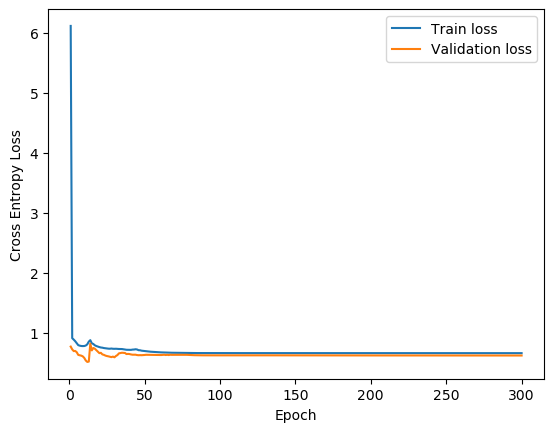

In [48]:
# Training on the best hyperparameters
epochs = 300

train_loss = []
valid_loss = []

# Initialize model, optimizer, and loss function
train_loader1 = DataLoader(dataset=train_data, batch_size=best_params['batch_size'])
model1 = WineMLPOpt(11, best_params['hidden_size'], 1, activation=best_params['activation'])
if best_params['optimiser'] == 'SGD':
    optimiser1 = torch.optim.SGD(params=model1.parameters(), lr=best_params['learning_rate'], momentum=best_params['momentum'])
elif best_params['optimiser'] == 'Adam':
    optimiser1 = torch.optim.Adam(params=model1.parameters(), lr=best_params['learning_rate'])
elif best_params['optimiser'] == 'RMSprop':
    optimiser1 = torch.optim.RMSprop(params=model1.parameters(), lr=best_params['learning_rate'])
criterion1 = torch.nn.MSELoss()

for epoch in range(epochs):
    batch_loss = []
    model1.train()
    for features, targets in train_loader1:
        output = model1.forward(features)
        loss = criterion1(output, targets)
        batch_loss.append(loss.item())
        optimiser1.zero_grad()
        loss.backward()
        optimiser1.step()
    model1.eval()
    train_loss.append(sum(batch_loss) / len(batch_loss))
    hyp_valid = model1.forward(valid_x)
    hyp_valid = hyp_valid.squeeze()
    c = torch.round(hyp_valid)
    valid_loss.append(criterion1(hyp_valid, valid_y).item())
    valid_acc = (c == valid_y).sum().item() / valid_y.shape[0]

# Plotting graph for epochs vs. train && epochs vs. valid
def plot_loss_curves(epochs, train_loss, valid_loss):
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, valid_loss, label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy Loss')
    plt.legend()
    plt.show()
plot_loss_curves(np.linspace(1, epochs, epochs), train_loss, valid_loss)

In [49]:
# Load the saved state dictionary into the model
model = WineMLPOpt(11, best_hidden_size, 1, activation=best_activation)
model_state_dict = torch.load('best_model.pth')
model.load_state_dict(model_state_dict)

<All keys matched successfully>

In [50]:
# Run the model on the validation set
hyp_valid = model.forward(valid_x)
hyp_valid = hyp_valid.squeeze()
c = torch.round(hyp_valid)
valid_loss = criterion(hyp_valid, valid_y).item()
valid_acc = (c == valid_y).sum().item() / valid_y.shape[0]
print('Valid acc:', valid_acc, 'Valid loss:', valid_loss)

Valid acc: 0.5958333333333333 Valid loss: 0.5654576420783997


In [51]:
# Run the model on the test set
hyp_test = model.forward(test_x)
hyp_test = hyp_test.squeeze()
c = torch.round(hyp_test)
test_loss = criterion(hyp_test, test_y).item()
test_acc = (c == test_y).sum().item() / test_y.shape[0]
print('Test acc:', test_acc, 'Test loss:', test_loss)

Test acc: 0.5625 Test loss: 0.5964192748069763


#### Improvement Results Over Baseline Model - 

Epochs - 100

Best Chosen Configuration - {'activation': 'leaky_relu',
  'batch_size': 10,
  'hidden_size': 10,
  'learning_rate': 0.001,
  'momentum': 0.9,
  'optimiser': 'SGD'},

#### > 10% Improvement Over Baseline

* Improvement in test accuracy from 0.42 to 0.56 -> which is > 10% increase
* Improvement in test loss from 0.79 to 0.59 -> which is > 10% decrease
* Improvement in validation accuracy from 0.41 to 0.59 -> which is > 10% increase
* Improvement in validation loss from 0.59 to 0.56 -> which is > 5% decrease

#### Explanation - 

* Since, the epochs were increased the model could converge better and hence give a better accuracy/loss. 
* Changing the batch_size and optimizer allowed the model to have a less noisy decent as compared to SGD.
* The same learning rate as the baseline model provided best accuracy with the other hyperparameters.


# Optional: Implementing the MLP

In [36]:
# Basic python implementation of a MLP
class MyMLP():
    def __init__(self, hidden_layer_tuple, activation_tuple):
        for act in activation_tuple:
            if act not in ['relu', 'sigmoid', 'none']:
                print(f"Invalid activation {act}. Model will now work.")
                return
            
        self.L = len(hidden_layer_tuple)

        self.params = {}
        for l in range(1, self.L):
            self.params["W" + str(l)] = rand_gen.normal(size=(hidden_layer_tuple[l], hidden_layer_tuple[l-1]))*0.01
            self.params["b" + str(l)] = np.zeros((hidden_layer_tuple[l], 1))

        self.layer_sizes = hidden_layer_tuple
        self.activations = activation_tuple
        self.learning_rate = 0.0001

    def relu(self, Z):
        return np.maximum(0, Z)
    
    def relu_deriv(self, A):
        return 1 * (A > 0)
    
    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
    
    def sigmoid_deriv(self, A):
        return A * (1 - A)
    
    def MSE(self, y_true, y_pred):
        return np.mean((np.array(y_true) - np.array(y_pred)) ** 2)
    
    def MSE_deriv(self, y_true, y_pred):
        return -2 * (np.array(y_true) - np.array(y_pred))
    
    def forward(self, X):
        out = np.array(X).copy()
        cache = {"A0": out.copy()}
        for l in range(1, self.L):
            Z = self.params["W" + str(l)] @ out + self.params["b" + str(l)]
            if self.activations[l-1] == 'relu':
                out = self.relu(Z)
            elif self.activations[l-1] == 'sigmoid':
                out = self.sigmoid(Z)
            elif self.activations[l-1] == 'none':
                out = Z
            else:
                print(f"Invalid activation at layer {l}. Stopping.")
                return
            cache["Z" + str(l)] = Z.copy()
            cache["A" + str(l)] = out.copy()
        self.cache = cache
        self.hypotheses = out.copy()
        return self.hypotheses

            
    def backprop(self, y_in):
        y = np.array(y_in).copy()
        loss = self.MSE(y, self.hypotheses)
        dl = self.MSE_deriv(y, self.hypotheses)
        cache = self.cache
        grads = {"dA"+str(self.L-1): dl}

        for l in range(self.L-1, 0, -1):
            if self.activations[l-1] == 'relu':
                grads["dZ" + str(l)] = grads["dA" + str(l)] * self.relu_deriv(cache["A" + str(l)])
            elif self.activations[l-1] == 'sigmoid':
                grads["dZ" + str(l)] = grads["dA" + str(l)] * self.sigmoid_deriv(cache["A" + str(l)])
            elif self.activations[l-1] == 'none':
                grads["dZ" + str(l)] = grads["dA" + str(l)] * 1
            else:
                print(f"Invalid activation at layer {l}. Stopping.")
                return

            grads["dW" + str(l)] = (grads["dZ" + str(l)] @ cache["A" + str(l-1)].T) / (y.shape[0] + 0.000001)
            grads["db" + str(l)] = (np.sum(grads["dZ" + str(l)], axis=1, keepdims=True)) / (y.shape[0] + 0.000001)
            grads["dA" + str(l-1)] = self.params["W" + str(l)].T @ grads["dZ" + str(l)]

            self.params["W" + str(l)] -= self.learning_rate * grads["dW" + str(l)]
            self.params["b" + str(l)] -= self.learning_rate * grads["db" + str(l)]
        return loss
    
    def fit(self, X, y, valid_x, valid_y, epochs=50, learning_rate=0.0001):
        self.learning_rate = learning_rate
        train_loss = []
        valid_loss = []

        for epoch in range(epochs):
            output = self.forward(X)
            loss = self.backprop(y)
            train_loss.append(loss)
            
            val_pred = self.forward(valid_x)
            val_pred = val_pred.squeeze()
            val_loss = self.MSE(valid_y, val_pred)
            valid_loss.append(val_loss)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}:\t Train loss: {loss:.4f}, Valid loss: {val_loss:.4f}")

        return train_loss, valid_loss

# Inspired by the implementation from:
# - https://www.freecodecamp.org/news/building-a-neural-network-from-scratch/
# - https://medium.com/swlh/training-an-mlp-from-scratch-using-backpropagation-for-solving-mathematical-equations-91b523c24748
# - https://stackoverflow.com/questions/42042561/relu-derivative-in-backpropagation



In [37]:
# Train the model and run the model on the validation set
epochs = 10000
model = MyMLP((11, 6, 1), ('relu', 'none'))
train_loss, valid_loss = model.fit(train_x.T, train_y.T, valid_x.T, valid_y.T, epochs=epochs, learning_rate=0.001)
val_pred = model.forward(valid_x.T)
val_pred = val_pred.squeeze()
c = np.round(val_pred)
valid_loss_1 = model.MSE(valid_y.T, val_pred)
valid_acc = np.sum(c.astype(int) == np.array(valid_y.T).astype(int)) / valid_y.shape[0]
print('Valid acc:', valid_acc, 'Valid loss:', valid_loss_1)

Epoch 0:	 Train loss: 32.7950, Valid loss: 31.7363
Epoch 100:	 Train loss: 0.8603, Valid loss: 0.7790
Epoch 200:	 Train loss: 0.6224, Valid loss: 0.5533
Epoch 300:	 Train loss: 0.6085, Valid loss: 0.5322
Epoch 400:	 Train loss: 0.5822, Valid loss: 0.5034
Epoch 500:	 Train loss: 0.5647, Valid loss: 0.4852


/var/folders/gy/c72q5khn4jv42tkd5s9tmlkr0000gn/T/ipykernel_44445/4131296895.py:4: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3618.)
  train_loss, valid_loss = model.fit(train_x.T, train_y.T, valid_x.T, valid_y.T, epochs=epochs, learning_rate=0.001)


Epoch 600:	 Train loss: 0.5379, Valid loss: 0.4612
Epoch 700:	 Train loss: 0.5316, Valid loss: 0.4545
Epoch 800:	 Train loss: 0.5260, Valid loss: 0.4487
Epoch 900:	 Train loss: 0.5224, Valid loss: 0.4447
Epoch 1000:	 Train loss: 0.5192, Valid loss: 0.4412
Epoch 1100:	 Train loss: 0.5150, Valid loss: 0.4368
Epoch 1200:	 Train loss: 0.5115, Valid loss: 0.4332
Epoch 1300:	 Train loss: 0.5106, Valid loss: 0.4317
Epoch 1400:	 Train loss: 0.5100, Valid loss: 0.4307
Epoch 1500:	 Train loss: 0.5063, Valid loss: 0.4270
Epoch 1600:	 Train loss: 0.5048, Valid loss: 0.4253
Epoch 1700:	 Train loss: 0.5025, Valid loss: 0.4229
Epoch 1800:	 Train loss: 0.5022, Valid loss: 0.4224
Epoch 1900:	 Train loss: 0.4996, Valid loss: 0.4198
Epoch 2000:	 Train loss: 0.4978, Valid loss: 0.4181
Epoch 2100:	 Train loss: 0.4962, Valid loss: 0.4165
Epoch 2200:	 Train loss: 0.4954, Valid loss: 0.4155
Epoch 2300:	 Train loss: 0.4979, Valid loss: 0.4176
Epoch 2400:	 Train loss: 0.4984, Valid loss: 0.4177
Epoch 2500:	 Tra

In [38]:
# Run the model on the test set
test_pred = model.forward(test_x.T)
test_pred = test_pred.squeeze()
c = np.round(test_pred)
test_loss = model.MSE(test_y.T, test_pred)
test_acc = np.sum(c.astype(int) == np.array(test_y.T).astype(int)) / test_y.shape[0]
print('Test acc:', test_acc, 'Test loss:', test_loss)

Test acc: 0.6 Test loss: 0.5226287608289722


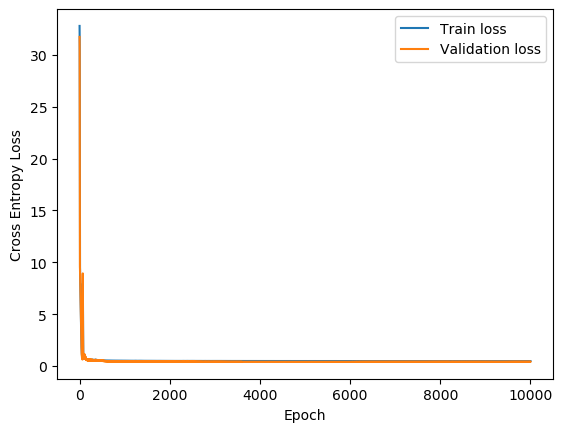

In [39]:
# Plotting graphs for epochs vs. train && epochs vs. valid
def plot_loss_curves(epochs, train_loss, valid_loss):
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, valid_loss, label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy Loss')
    plt.legend()
    plt.show()

plot_loss_curves(np.linspace(1, epochs, epochs), train_loss, valid_loss)